# GISNUM: Atelier sur l'application des sciences des données dans le domaine médical

Date de l'atelier: le jeudi 13 janvier 2022

Préparé par Laurence Liang

On utilisera des données médicales pour prédire si un patient est diagnostiqué avec une maladie cardiaque

* Source des données simplifiées (Kaggle/UC Irvine): https://www.kaggle.com/ronitf/heart-disease-uci
* Source initiale des données avec description détaillée (UC Irvine): https://archive.ics.uci.edu/ml/datasets/heart+disease

**Environnement web pour programmer cet atelier**:

Après avoir accédé à ce lien, cliquez "fork repl" en haut à droite: https://replit.com/@LaurenceLiang/Atelier-GISNUM-2022-01-13#main.py

## Partie 1: Types de variables

Pour cet atelier, on introduit 3 types de concepts:

* les variables
* les fonctions
* les listes

### Qu'est-ce qu'une variable?

Une variable est une valeur qu'on associe à un nom

Une variable peut être défini par plusieurs types, qui incluent:
* un nombre entier
* un nombre décimal
* un texte (appelé string en anglais, défini par des guillemets "...")

En Python, tout texte qui suit un signe # est un commentaire: du texte que l'ordinateur n'éxecute pas. Autrement dit, les commentaires servent comme notes pour le programmeur.

In [4]:
x = 1          # exemple de nombre entier (integer)
y = 1.0        # exemple de nombre décimal (float)
z = "salut!"   # exemple de texte (string)

print(x)
print(y)
print(z)

1
1.0
salut!


### Qu'est-ce qu'une fonction?

Une fonction est un bloc de code réutilisable qui prend des variables "input" et qui retourne des valeurs "output".

En Python, une fonction suit un syntaxe strict et prédéfini

In [5]:
def addition(a,b):
    return a+b

print(addition(2,3))
print(addition(10,15))

5
25


### Qu'est-ce qu'une liste?

Une liste est un type de variable qui englobe un ensemble de valeurs.

En Python, une liste est définie avec des crochets et des valeurs séparées par des virgules: `[1,2,3]`

De plus, on peut accéder les valeurs d'une liste en l'indexant avec des crochets: `liste[début:fin]`

In [9]:
liste = ["pomme", "orange", "raisin"]

print(liste[0])    # la position 0 est la position du premier élément
print(liste[0:2])

pomme
['pomme', 'orange']


Dans la plupart des langues de programmation, les positions des éléments d'une liste sont décalées par -1. 

```
Le premier  élément occupe un indexe de 0

Le deuxième élément occupe un indexe de 1

... et ainsi de suite ...
```

## Partie 2: Lecture des données


### Importer des libraires et les données

Repl.it installe automatiquement les librairies nécessaires.

Pour l'utilisation locale sur un ordinateur, il est préférable d'installer les librairies avec [Pip](https://pypi.org/project/pip/)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# lecture des données
donnees = pd.read_csv("heart.csv")

### Un apreçu des données

In [77]:
donnees.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
donnees.shape

(303, 14)

In [70]:
donnees_negatives = donnees[donnees["target"]==0]
donnees_positives = donnees[donnees["target"]==1]

## Partie 3: Visualisation des données

### Un exemple d'exporter une visualisation des données

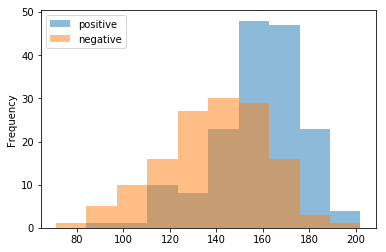

In [71]:
thalach = pd.DataFrame({"positive": donnees_positives["thalach"], "negative": donnees_negatives["thalach"]})
graphe = thalach.plot.hist(alpha=0.5)
fig = graphe.get_figure()
fig.savefig("thalach.png")

### Données négatives (sans une maladie cardiaque)

(Seulement faisiable sur Jupyter Notebook)

Résultats


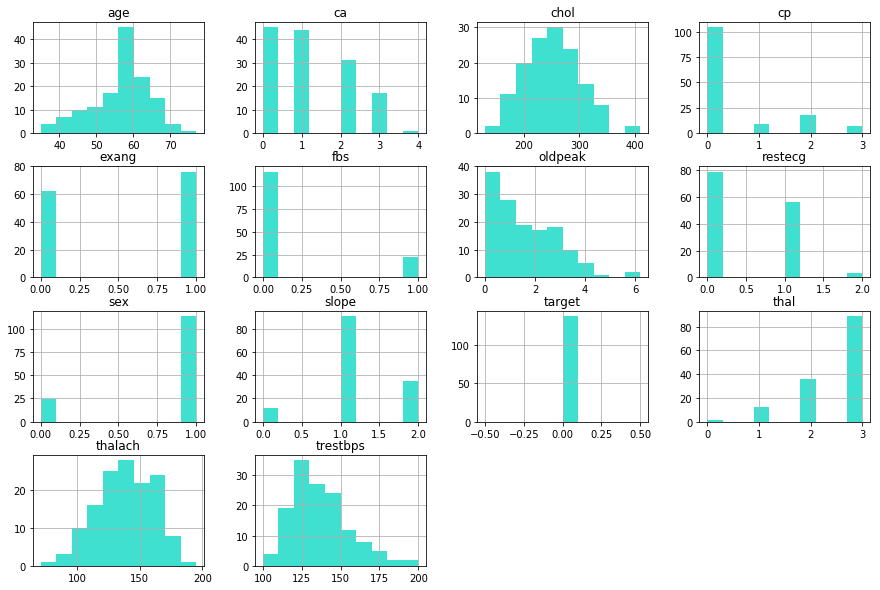

In [72]:
x = donnees_negatives.hist(bins=10, figsize=(15, 10), color="turquoise")
print("Résultats")

### Données positives (avec une maladie cardiaque)

(Seulement faisable sur Jupyter Notebook)

Résultats


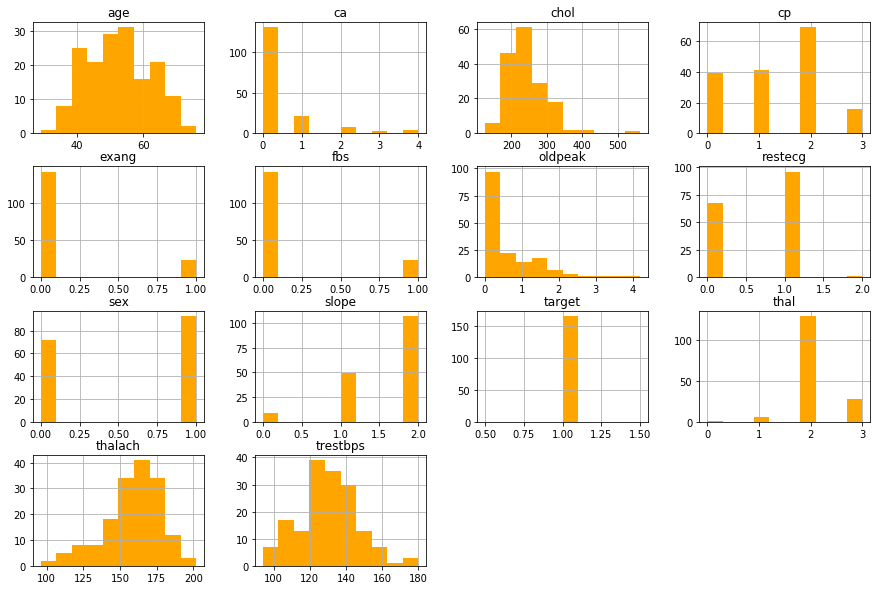

In [73]:
donnees_positives.hist(bins=10, figsize=(15, 10), color="orange")
print("Résultats")

### Données négaives (sans une maladie cardiaque)

In [74]:
donnees[donnees["target"]==0].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


### Données positives (avec une maladie cardiaque)

In [75]:
donnees[donnees["target"]==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


## Partie 4: Analyse prédictif des données

### Préparation des données pour un modèle prédictif

In [23]:
from sklearn.model_selection import train_test_split

X_data = donnees.drop("target", axis=1)
y_data = donnees["target"]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Utiliser un arbre de décision pour donner des diagnostiques

In [25]:
from sklearn.tree import DecisionTreeClassifier

arbre = DecisionTreeClassifier()
arbre.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Le taux de précision du modèle (environ 77%)

In [26]:
arbre.score(X_test, y_test)

0.7704918032786885

### Soumettre des prédictions avec le modèle

In [35]:
patient_1 = {
    "age": 0,
    "sex": 0,
    "cp": 0,
    "trestbps": 0,
    "chol": 0,
    "fbs": 0,
    "restecg": 0,
    "thalach": 0,
    "exang": 0,
    "oldpeak": 0,
    "slope": 0,
    "ca": 0,
    "thal": 0    
}

In [36]:
def conversion_numerique(patient):
    valeurs_numeriques = patient.values()
    liste_numerique = list(valeurs_numeriques)
    return liste_numerique

In [40]:
liste_de_patients = [conversion_numerique(patient_1)]

print(arbre.predict(liste_de_patients))

[0]
